# Itérateur

Lorsqu'on écrit ``for element in ensemble``, la variable ``element`` désigne tour à tour chaque élément d'un ensemble. Lorsque cet ensemble existe, on parle d'itérateur. Lorsqu'il n'existe que de façon virtuelle, on parte de générateur. La fonction [range](https://docs.python.org/3/library/stdtypes.html#range) génère des entiers sans que l'ensemble d'où ils viennent existe. D'ailleurs, quand on l'affiche :

In [26]:
print(range(5))

range(0, 5)


Mais on peut stocker tous ces éléments dans une liste :

In [27]:
print(list(range(5)))

[0, 1, 2, 3, 4]


La fonction `range` est équivalente au code suivant en python :

In [28]:
def range_like(n):
    for i in range(n):
        yield i


print(range_like(5))

<generator object range_like at 0x7f1dc597b220>


In [29]:
print(list(range_like(5)))

[0, 1, 2, 3, 4]


Le mot-clé `yield` émet un élément. L'exécution sort de la fonction avec cet élément comme résultat puis elle y retourne. L'exemple suivant insère des `print` pour comprendre quelle ligne s'exécute à quel moment.

In [30]:
def range_like(n):
    for i in range(n):
        print("A")
        yield i


for k in range_like(5):
    print("B", k)

A
B 0
A
B 1
A
B 2
A
B 3
A
B 4


In [31]:
import random


def random_generator(n):
    for i in range(n):
        print("A")
        yield random.random()


for k in random_generator(5):
    print("B", k)

A
B 0.15382301030555623
A
B 0.8963148242847391
A
B 0.5960121288362235
A
B 0.20451752514212185
A
B 0.8937299506306294


Le mot-clé `yield` est utilisé pour énumérer les éléments d'un ensemble sans que cet ensemble existe vraiment. Il suffit que cette énumération suive une certaine logique qu'on applique dans l'exemple suivant à l'énumération des feuilles d'un arbre.

In [32]:
class Noeud:
    def __init__(self, v):
        self.v = v
        self.left = None
        self.right = None

    def __str__(self):
        return (
            f"{self.v}:"
            f"{0 if self.left is None else 1}"
            f"{0 if self.right is None else 1}"
        )

    def leave_generator(self):
        if self.left is None or self.right is None:
            yield self
        if self.left is not None:
            for leave in self.left.leave_generator():
                yield leave
        if self.right is not None:
            for leave in self.right.leave_generator():
                yield leave


def graph():
    na = Noeud("A")
    na.left = Noeud("B")
    na.left.left = Noeud("C")
    na.left.right = Noeud("D")
    na.right = Noeud("E")
    return na


gr = graph()
for leave in gr.leave_generator():
    print(leave)

C:00
D:00
E:00


## Génération d'un arbre aléatoire

Un arbre avec un seul noeud est toujours le même. Le second noeud peut être *accroché* à gauche ou droite du premier. Et c'est ainsi qu'on peut créer un arbre aléatoire, chaque nouveau noeud est inséré au bout d'un chemin existant. Ce chemin est choisi en partant du premier noeud - la racine - puis en allant à gauche ou à droite de façon aléatoire jusqu'à arriver à un noeud qui n'a pas de fils.

In [33]:
import textwrap


class Noeud:
    def __init__(self, v):
        self.v = v
        self.left = None
        self.right = None

    def __str__(self):
        rows = [str(self.v)]
        if self.left is not None:
            rows.append("+-" + textwrap.indent(str(self.left), "  ")[2:])
        if self.right is not None:
            rows.append("+-" + textwrap.indent(str(self.right), "  ")[2:])
        return "\n".join(rows)

    def add_alea(self, node):
        h = random.randint(0, 1)
        if h == 0:
            if self.left is None:
                self.left = node
            else:
                self.left.add_alea(node)
        else:
            if self.right is None:
                self.right = node
            else:
                self.right.add_alea(node)

    def profondeur_maximale(self):
        pleft = 0 if self.left is None else self.left.profondeur_maximale() + 1
        pright = 0 if self.right is None else self.right.profondeur_maximale() + 1
        return max(pleft, pright)


root = Noeud("A")
for c in "BCDEFGHIJKL":
    print("--------")  # cette séparation permet de mieux voir ce qu'il se passe
    print(root)  # on affiche l'arbre à chaque itération
    root.add_alea(Noeud(c))
print("##########")
print(root)

--------
A
--------
A
+-B
--------
A
+-B
  +-C
--------
A
+-D
+-B
  +-C
--------
A
+-D
+-B
  +-C
  +-E
--------
A
+-D
+-B
  +-C
    +-F
  +-E
--------
A
+-D
  +-G
+-B
  +-C
    +-F
  +-E
--------
A
+-D
  +-G
    +-H
+-B
  +-C
    +-F
  +-E
--------
A
+-D
  +-G
    +-H
      +-I
+-B
  +-C
    +-F
  +-E
--------
A
+-D
  +-G
    +-H
      +-I
+-B
  +-C
    +-F
      +-J
  +-E
--------
A
+-D
  +-G
    +-H
      +-I
  +-K
+-B
  +-C
    +-F
      +-J
  +-E
##########
A
+-D
  +-G
    +-H
      +-L
      +-I
  +-K
+-B
  +-C
    +-F
      +-J
  +-E


## Profondeur maximale

Quelle est la profondeur maximale d'un arbre aléaatoire ? C'est forcément une variable aléatoire. Elle est comprise entre $\log n$ et $n$ si $n$ est le nombre de noeud du graphe insérés dans le graphe aléatoire. L'exemple suivant calcule la profondeur maximale tout au long de sa création.

 37%|███▋      | 374/1024 [00:00<00:00, 3732.04it/s]

100%|██████████| 1024/1024 [00:00<00:00, 2136.80it/s]


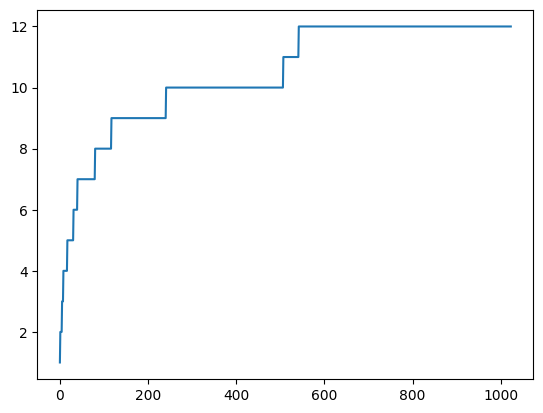

In [35]:
import tqdm
import matplotlib.pyplot as plt

x = []
y = []
root = Noeud("A")
numeros = list(range(2**10))
for c in tqdm.tqdm(numeros):
    root.add_alea(Noeud(c))
    x.append(c)
    y.append(root.profondeur_maximale())

plt.plot(x, y);

Il faudrait recommencer plein de fois pour en tirer l'intuition d'un résultat théorique.